# Analyse descriptives des données "Openfoodfacts"

In [1]:
# importation des librairies nécessaires

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import scipy.stats as stats
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = 'openfoodfacts_clean.csv'

In [3]:
df = pd.read_csv(filepath)
df.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,0000001938067,http://world-en.openfoodfacts.org/product/0000...,b7,1484501528,2017-01-15T17:32:08Z,1546189714,2018-12-30T17:08:34Z,Chaussons tressés aux pommes,1.200 kg,Kirkland Signature,...,260.0,1090.0,10.70,2.00,38.7,24.70,2.00,3.33,0.647,0.259
1,00004714,http://world-en.openfoodfacts.org/product/0000...,giuliano,1566754691,2019-08-25T17:38:11Z,1572635752,2019-11-01T19:15:52Z,piadina romagnola alla riminese all'olio extra...,350 gr,Da Gastone s. r. l.,...,304.0,1270.0,7.01,2.48,52.2,1.62,1.88,7.09,1.620,0.650
2,000050,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1480541444,2016-11-30T21:30:44Z,1558712294,2019-05-24T15:38:14Z,Financiers aux Amandes,660 g,Bijou,...,446.0,1866.0,23.00,10.00,51.0,39.00,1.70,8.00,0.550,0.220


In [4]:
df.shape

(15913, 38)

In [5]:
print('Nombre de produits :', len(df['product_name'].unique()))

Nombre de produits : 14811


In [6]:
print('Nombre de marques :', len(df['brands'].unique()))

Nombre de marques : 6344


# Analyses univariées

## Description de la distribution des variables

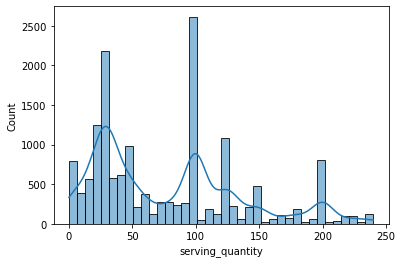

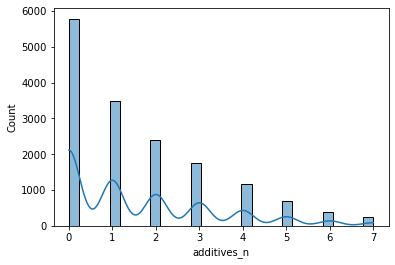

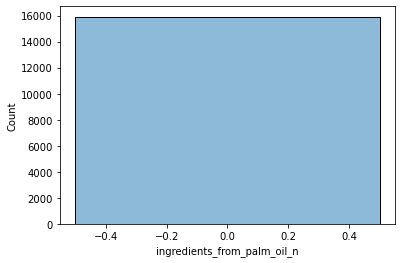

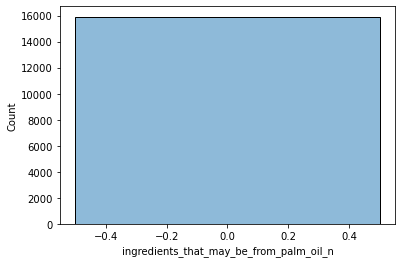

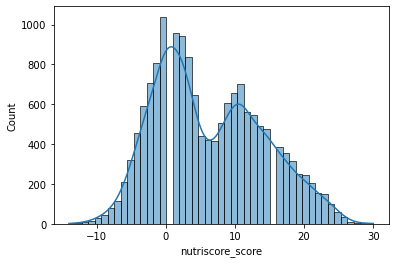

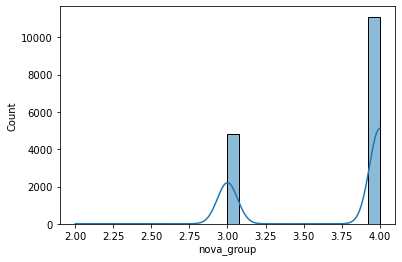

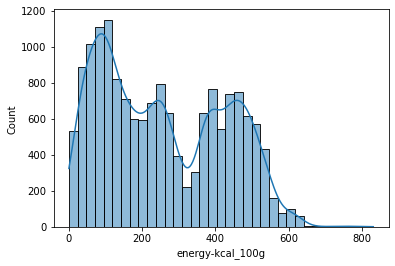

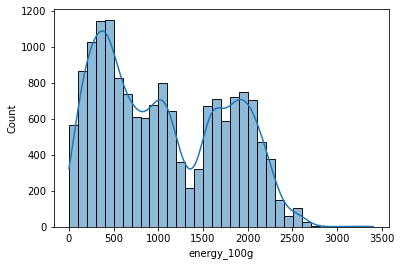

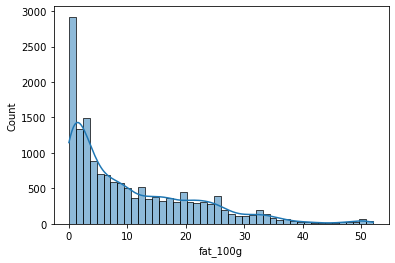

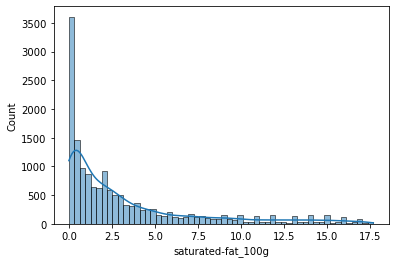

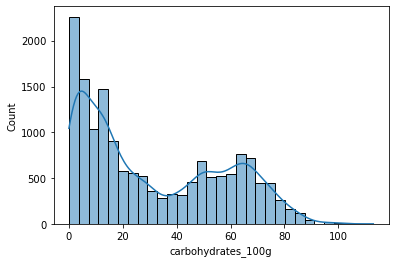

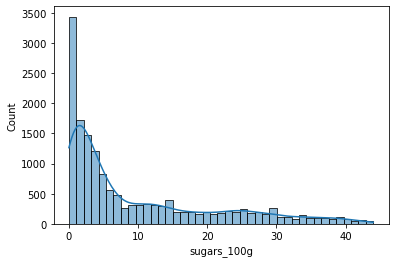

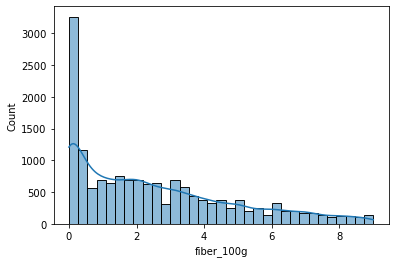

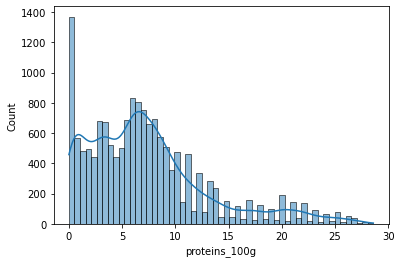

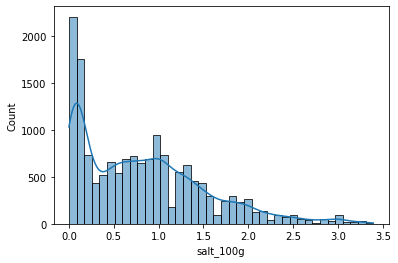

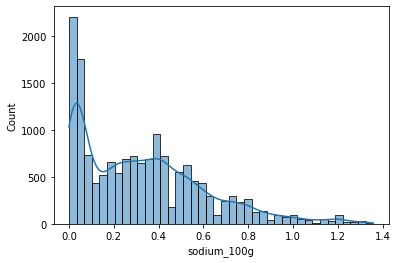

In [7]:
for var in df.columns:
    if df[var].dtypes == 'float64':
        sns.histplot(x=var, data=df, kde=True)
        plt.show()

In [8]:
pg.normality(df, method='normaltest', alpha=0.05)

,W,pval,normal
created_t,3430.407995,0.000000e+00,False
last_modified_t,3719.463363,0.000000e+00,False
serving_quantity,1278.154640,2.832998e-278,False
additives_n,2163.287608,0.000000e+00,False
ingredients_from_palm_oil_n,39671.890680,0.000000e+00,False
ingredients_that_may_be_from_palm_oil_n,39671.890680,0.000000e+00,False
nutriscore_score,1197.924450,7.481880e-261,False
nova_group,10821.789993,0.000000e+00,False
energy-kcal_100g,10551.185617,0.000000e+00,False
energy_100g,11691.509778,0.000000e+00,False


In [9]:
pg.homoscedasticity(df, method='levene', alpha=0.05)

,W,pval,equal_var
levene,0.000685,1.0,True


## Analyses descriptives des variables

### Analyses graphiques des variables

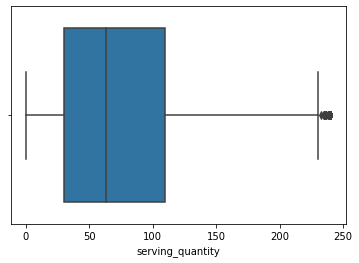

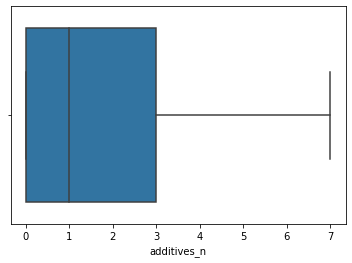

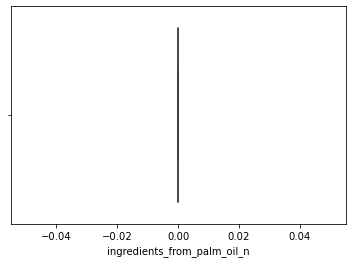

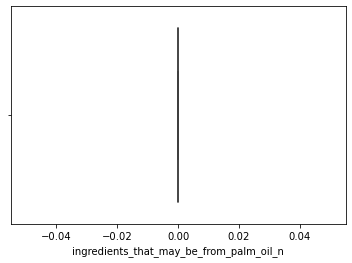

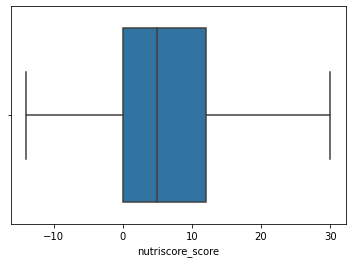

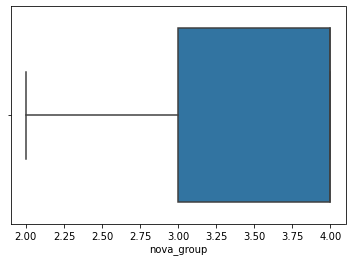

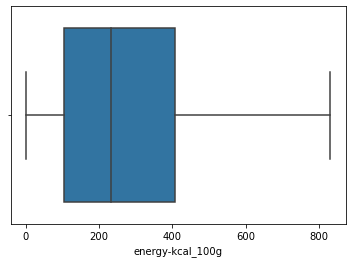

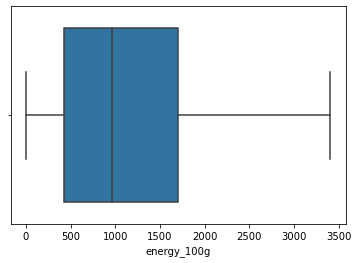

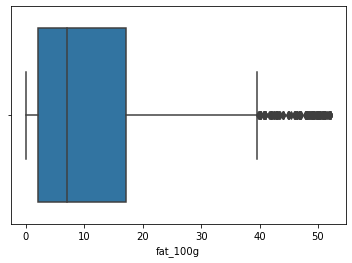

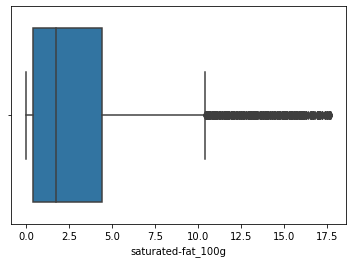

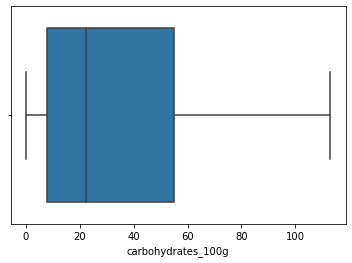

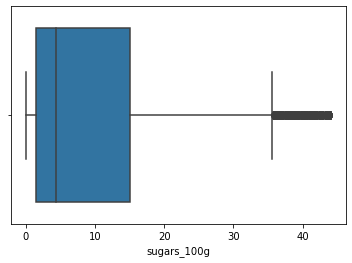

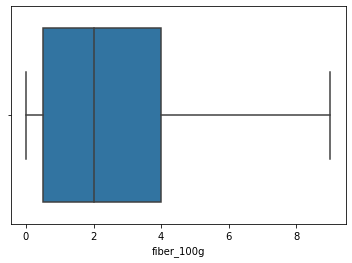

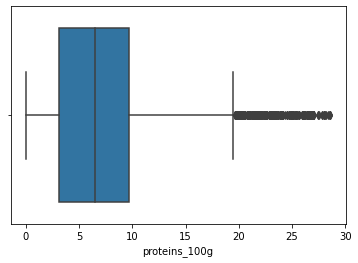

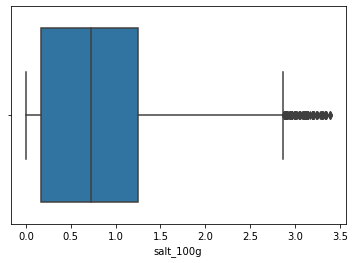

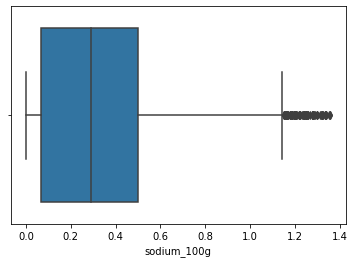

In [10]:
for var in df.columns:
    if df[var].dtypes == 'float64':
        sns.boxplot(x=var, data=df)
        plt.show()

### Analyses statistiques des variables

In [11]:
df.describe()

,created_t,last_modified_t,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,1.591300e+04,1.591300e+04,15913.000000,15913.000000,15913.0,15913.0,15913.000000,15913.000000,15913.000000,15913.000000,15913.000000,15913.000000,15913.000000,15913.000000,15913.000000,15913.000000,15913.000000,15913.000000
mean,1.516684e+09,1.603625e+09,78.438804,1.618802,0.0,0.0,6.283919,3.696977,256.037660,1065.427211,10.792606,3.298496,31.289436,9.760542,2.531657,7.328841,0.824918,0.329991
std,5.369308e+07,1.978482e+07,58.746794,1.759833,0.0,0.0,7.808251,0.461354,167.685498,699.333254,10.872294,4.074070,26.027462,11.073455,2.346767,5.746092,0.702939,0.281230
min,1.416759e+09,1.530207e+09,0.000000,0.000000,0.0,0.0,-14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.476206e+09,1.592822e+09,30.000000,0.000000,0.0,0.0,0.000000,3.000000,104.000000,431.000000,2.000000,0.400000,7.800000,1.410000,0.500000,3.100000,0.170000,0.068000
50%,1.515763e+09,1.612887e+09,63.000000,1.000000,0.0,0.0,5.000000,4.000000,233.000000,966.000000,7.000000,1.750000,22.300000,4.400000,2.000000,6.450000,0.730000,0.292000
75%,1.560442e+09,1.617140e+09,110.000000,3.000000,0.0,0.0,12.000000,4.000000,408.000000,1702.000000,17.110000,4.400000,55.000000,15.100000,4.000000,9.700000,1.250000,0.500000
max,1.623846e+09,1.623885e+09,240.000000,7.000000,0.0,0.0,30.000000,4.000000,831.000000,3406.000000,52.100000,17.700000,113.000000,44.000000,9.000000,28.600000,3.392857,1.357143


# Analyses bivariées des variables